![image.png](attachment:image.png)

# TF1 Classification (2Layers baseline)
## MNIST Introduction
- MNIST (Mixed National Institute of Standards and Technology database)
- **손글씨 숫자(0~9) 이미지 데이터**
- 각 이미지는 **가로와 세로가 각각 28px, 흑백 이미지**로 만들어져 있음
- Training data == 55,000장, Validation data == 5,000장, Test data = 10,000장

### Prepare the data

In [15]:
from tensorflow.keras import datasets # MNIST Data는 Tensorflow 2.x를 통해 가져올 수 있습니다.

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

In [19]:
print(train_data.shape)# # of training data == 60000, each data = 28px * 28px
print(test_data.shape) # # of test data == 10000

(60000, 28, 28)
(10000, 28, 28)


In [22]:
import pandas as pd

# pd.DataFrame(train_data[0])

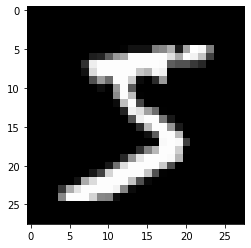

In [23]:
import matplotlib.pyplot as plt

plt.imshow(train_data[0], cmap='gray') # 60000장의 train data 중 첫번째 data

### Normalization

In [24]:
# 각 이미지(28px * 28px)는 0~255 사이의 숫자로 이루어져 있습니다.

print(train_data.min())
print(train_data.max()) 

0
255


In [25]:
# 각 이미지를 [28행 x 28열]에서 [1행 x 784열]로 펼쳐줍니다. 
# 각 이미지 내의 pixel 값을 [0~255]에서 [0~1]로 바꿔줍니다.

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

In [26]:
train_data.shape

(60000, 784)

###  One-hot encoding

In [27]:
# 각 이미지에 대한 label은 integer value로 이루어져 있습니다. (정답)

train_label

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [28]:
# 각 label을 integer value에서 one-hot vector로 변경해줍니다. (Tensorflow 2.x 활용)

from tensorflow.keras import utils

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

In [29]:
train_label.shape

(60000, 10)

In [30]:
# 기존의 integer label들이 아래와 같은 one-hot vector들로 변경된 것을 확인할 수 있습니다.

import pandas as pd

pd.DataFrame(train_label).head(3)

,0,1,2,3,4,5,6,7,8,9
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [31]:
train_label[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

### Build the model

In [32]:
# import tensorflow as tf

import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # https://stackoverflow.com/questions/35911252/disable-tensorflow-debugging-information
tf.logging.set_verbosity(tf.logging.ERROR)

Instructions for updating:
non-resource variables are not supported in the long term


In [33]:
# 데이터가 흘러들어올 접시(placeholder) 만들기 

X = tf.placeholder(tf.float32, [None, 784]) # [# of batch data, # of features(columns) == 총 784(28*28)개의 열]
Y = tf.placeholder(tf.float32, [None, 10]) # 0~9 == 총 10개의 열

In [34]:
# 모든 Parameter Theta는 Variable로 선언

W1 = tf.Variable(tf.random_normal([784, 256], stddev=0.01)) # weight
L1 = tf.nn.relu(tf.matmul(X, W1)) # hidden layer
# [none, 256]

In [35]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev=0.01)) # weight, node(퍼셉트론) 수 = 256
L2 = tf.nn.relu(tf.matmul(L1, W2)) # hidden layer
# [none, 256]

In [36]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev=0.01)) # weight
# [none, 10]
model = tf.matmul(L2, W3) # 마지막 층도 행렬곱까지만 진행

### Set the criterion

In [37]:
# cost = tf.losses.mean_squared_error(Y, model) # for Regression

cost = tf.losses.softmax_cross_entropy(Y, model) # for Classification, "cross-entropy" after "softmax"
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost) # Select optimizer & connect with cost function (recommended start : "Adam")

### Train the model

In [39]:
init = tf.global_variables_initializer()  # Initialize all global variables (Parameter Theta)
sess = tf.Session()
sess.run(init)

In [40]:
# Gradient descent를 적용하기 전까지 한번에 밀어넣는 데이터의 수 지정 (Batch size == 하나의 데이터 덩어리 내 데이터 수)

batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [41]:
# import tqdm 
# for epoch in tqdm.notebook.tqdm(range(15)):

for epoch in range(15):
    
    
    total_cost = 0 # 매 epoch 마다의 평균 에러 값 계산을 위해 활용됩니다.
    batch_idx = 0 # 매 batch 마다 꺼낼 데이터의 시작 index 값 지정을 위해 활용됩니다.
    
    for i in range(total_batch): # iterate over # of batches
        
        # Training data(60000장)에서 batch_size(100개) 만큼 순서대로 꺼내어 학습에 활용해줍니다.
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, Y: batch_y}) # 먹여줄(feed) 딕셔너리(dict)
        
        # 이번 batch를 기준으로 계산이 끝난 Cross-entropy 값을 total_cost에 더해줍니다. (epoch 종료 후 평균을 냅니다.)
        batch_cost = sess.run(cost, feed_dict={X: batch_x, Y: batch_y})
        total_cost = total_cost + batch_cost
        
        # 다음 for loop에서 꺼낼 데이터의 시작 index 번호를 batch_size(100) 만큼 증가시킵니다.
        batch_idx += batch_size
    
    
    # (이번 epoch가 종료되었을 시점의) training data 기준 Cross-entropy 값을 계산합니다.
    training_cost = total_cost / total_batch
    
    # (이번 epoch가 종료되었을 시점의) test data 기준 Cross-entropy 값을 계산합니다.
    test_cost = sess.run(cost, feed_dict={X: test_data, Y: test_label}) 
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost), 
          '|| Current Test cost = {:.3f}'.format(test_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.393 || Current Test cost = 0.200
Epoch: 2 || Avg. Training cost = 0.144 || Current Test cost = 0.123
Epoch: 3 || Avg. Training cost = 0.089 || Current Test cost = 0.116
Epoch: 4 || Avg. Training cost = 0.060 || Current Test cost = 0.114
Epoch: 5 || Avg. Training cost = 0.042 || Current Test cost = 0.103
Epoch: 6 || Avg. Training cost = 0.029 || Current Test cost = 0.120
Epoch: 7 || Avg. Training cost = 0.021 || Current Test cost = 0.113
Epoch: 8 || Avg. Training cost = 0.016 || Current Test cost = 0.092
Epoch: 9 || Avg. Training cost = 0.013 || Current Test cost = 0.084
Epoch: 10 || Avg. Training cost = 0.011 || Current Test cost = 0.101
Epoch: 11 || Avg. Training cost = 0.008 || Current Test cost = 0.095
Epoch: 12 || Avg. Training cost = 0.006 || Current Test cost = 0.097
Epoch: 13 || Avg. Training cost = 0.006 || Current Test cost = 0.089
Epoch: 14 || Avg. Training cost = 0.004 || Current Test cost = 0.119
Epoch: 15 || Avg. Training cost = 0.003 || 

#### 5. Test the model

In [42]:
# Test data에서 첫번째 행(1행 x 784열)을 꺼내는 코드입니다.
# (Scikit-learn의 첫번째 실습이었던 Linear-regression 실습에서 하나의 열을 꺼낼 때 행렬 형태로 꺼내던 방법을 떠올려보세요.)

test_data[0:1, :].shape 

(1, 784)

In [43]:
# 데이터 1건에 대하여 마지막 output layer의 출력값을 얻을 수 있습니다. (softmax 적용 전의 10개 숫자)

sess.run(model, feed_dict={X: test_data[0:1, :]}) 

array([[-10.510924 ,   1.5198282,  -8.211631 ,  -8.1563015, -11.881819 ,
        -22.102556 , -42.188187 ,  19.739374 , -14.385106 ,  -3.5091398]],
      dtype=float32)

In [44]:
# 위 10개의 숫자 중 가장 큰 값의 index 번호를 얻어냅니다 (np.argmax와 동일)

sess.run(tf.argmax(model, 1), feed_dict={X: test_data[0:1, :]}) # argmax 함수의 두번째 argument "1"은 행 방향을 의미합니다.

array([7])

In [45]:
# 실제 정답인 test label 중 첫번째 행의 가장 큰 값의 index 번호를 얻어내어 비교함으로써 모델이 맞췄는지 확인이 가능합니다. 

sess.run(tf.argmax(Y, 1), feed_dict={Y: test_label[0:1, :]})

array([7])

#### 정확도 계산 (tf.argmax / tf.equal / tf.cast / tf.reduce_mean 활용)

In [47]:
# tf.argmax([0.1 0 0 0.7 0 0.2 0 0 0 0]) -> 3 (가장 큰 값의 index를 return)

is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(Y, 1)) # model : 예측값, Y : 실제 정답
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32)) # 자료형 변환(type-"cast") 후, 차원을 줄이면서(reduce) 평균(mean) 계산

In [48]:
# 10,000건의 Test data 전체에 대해 모델의 정확도를 계산합니다.

print('정확도 :', sess.run(accuracy,
                        feed_dict={X: test_data,
                                   Y: test_label}))

정확도 : 0.9815


In [49]:
# 모델 예측 결과값

predicted_labels = sess.run(tf.argmax(model, 1), feed_dict={X: test_data, Y: test_label})
print(list(predicted_labels)[:10])

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]


In [50]:
# 실제 정답 

import numpy as np
print(np.argmax(test_label, 1)[:10])

[7 2 1 0 4 1 4 9 5 9]


# Dropout

## Prepare the data

In [64]:
from tensorflow.keras import datasets, utils

(train_data, train_label), (test_data, test_label) = datasets.mnist.load_data()

train_data = train_data.reshape(60000, 784) / 255.0
test_data = test_data.reshape(10000, 784) / 255.0

train_label = utils.to_categorical(train_label) # 0~9 -> one-hot vector
test_label = utils.to_categorical(test_label) # 0~9 -> one-hot vector

## Bulid the model

In [65]:
X = tf.placeholder(tf.float32, [None, 784])
y = tf.placeholder(tf.float32, [None, 10])

keep_prob = tf.placeholder(tf.float32) # 살려줄  node의 비율

In [66]:
W1 = tf.Variable(tf.random_normal([784, 256], stddev= 0.01))
L1 = tf.nn.relu(tf.matmul(X, W1))
L1 = tf.nn.dropout(L1, keep_prob) # Dropout을 적용할 layer & 살릴 비율

In [67]:
W2 = tf.Variable(tf.random_normal([256, 256], stddev= 0.01))
L2 = tf.nn.relu(tf.matmul(L1, W2))
L2 = tf.nn.dropout(L2, keep_prob) # Dropout을 적용할 layer & 살릴 비율

In [68]:
W3 = tf.Variable(tf.random_normal([256, 10], stddev= 0.01))
model = tf.matmul(L2, W3)

## See the criterion

In [69]:
cost = tf.losses.softmax_cross_entropy(y, model)
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

## Train the model

In [70]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [71]:
batch_size = 100
total_batch = int(len(train_data) / batch_size)
print(total_batch)

600


In [72]:
for epoch in range(15):
    
    
    total_cost = 0
    batch_idx = 0
    
    for i in range(total_batch):
        
        batch_x = train_data[ batch_idx : batch_idx + batch_size ]
        batch_y = train_label[ batch_idx : batch_idx + batch_size ]
        
        sess.run(optimizer, feed_dict={X: batch_x, 
                                       y: batch_y, 
                                       keep_prob: 0.8}) # node 중 80%만 유지하고 20%를 train 시마다 off
        
        batch_cost = sess.run(cost, feed_dict={X: batch_x, 
                                               y: batch_y, 
                                               keep_prob: 0.8})
        total_cost = total_cost + batch_cost
        
        batch_idx += batch_size
    
    
    training_cost = total_cost / total_batch
    
    
    print('Epoch: {}'.format(epoch + 1), 
          '|| Avg. Training cost = {:.3f}'.format(training_cost))

print('Learning process is completed!')

Epoch: 1 || Avg. Training cost = 0.409
Epoch: 2 || Avg. Training cost = 0.155
Epoch: 3 || Avg. Training cost = 0.104
Epoch: 4 || Avg. Training cost = 0.079
Epoch: 5 || Avg. Training cost = 0.064
Epoch: 6 || Avg. Training cost = 0.051
Epoch: 7 || Avg. Training cost = 0.044
Epoch: 8 || Avg. Training cost = 0.040
Epoch: 9 || Avg. Training cost = 0.033
Epoch: 10 || Avg. Training cost = 0.032
Epoch: 11 || Avg. Training cost = 0.029
Epoch: 12 || Avg. Training cost = 0.027
Epoch: 13 || Avg. Training cost = 0.025
Epoch: 14 || Avg. Training cost = 0.023
Epoch: 15 || Avg. Training cost = 0.023
Learning process is completed!


## Test the model

In [73]:
is_correct = tf.equal(tf.argmax(model, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))

In [75]:
print('정확도:', sess.run(accuracy,
                      feed_dict= {X:test_data,
                                 y : test_label,
                                 keep_prob : 1})) # 정확도를 측정하는 Test 단계에서는 전체 Node를 살려줘야 합니다.

정확도: 0.9786


## Appendix. Save the predicted values

In [76]:
# 모델의 예측값을 labels에 저장
label = sess.run(tf.argmax(model, 1 ), feed_dict= {X : test_data, y : test_label, keep_prob : 1})

label

array([7, 2, 1, ..., 4, 5, 6])

In [78]:
print(np.argmax(test_label, 1))

[7 2 1 ... 4 5 6]


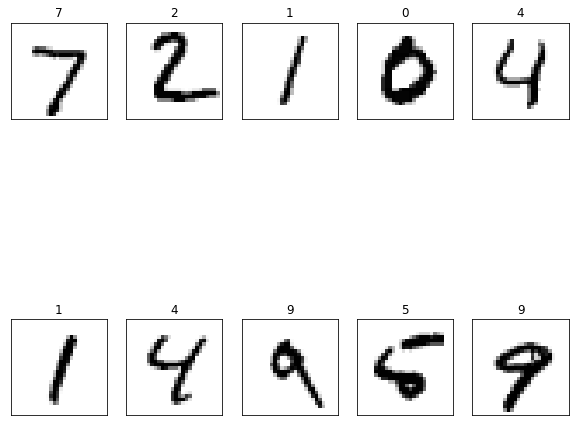

In [80]:
fig = plt.figure(figsize=(10, 10))

for i in range(10):
    subplot = fig.add_subplot(2, 5, i + 1)
    subplot.set_xticks([])
    subplot.set_yticks([])
    subplot.set_title('%d' % label[i])
    subplot.imshow(test_data[i].reshape((28, 28)),
                   cmap=plt.cm.gray_r)

plt.show() # 상단의 번호가 예측된 숫자, 아래의 이미지가 실제 데이터(이미지 내 숫자)